# Bike Buyer Prediction
## Customer Data Processing

The dataset i used is private data and can be found at https://drive.google.com/open?id=14Us9JSvbKm9xoS85rYFK0_ujREeelvOs

we will be doing the following preprocessing tasks to prepare the data:
    - Finding of missing values and fill them with appropriate values
    - Fill missing continuous values with column median
    - Remove outliers using statistical analysis
    - Perform a One Hot Encoding of the categorical features

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import visuals as vs

In [2]:
os.chdir('C:/Users/hp/Desktop/DataSets')

In [3]:
data=pd.read_csv('bikebuyer1.csv')

In [4]:
data.head()

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes


In [5]:
data.describe()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
count,6996.000000,6997.000000,6979.000000,6997.000000,6968.000000,6997.000000
mean,17744.435249,57020.151493,1.111621,1.586823,4.210103,45.107332
std,4337.428859,32080.449720,1.600912,1.146782,2.926211,11.916654
min,2.000000,0.000000,0.000000,0.000000,1.000000,25.000000
25%,14249.750000,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,17406.500000,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,20609.500000,70000.000000,2.000000,2.000000,6.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,13.000000,96.000000


# Treatment for Missing Values

In [6]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status      16
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [7]:
data['Gender'].value_counts()

Male      3527
Female    3441
Name: Gender, dtype: int64

**since the count of males is higher in gender we have to replace the missing values with male attribute**

In [8]:
data['Gender'].fillna('Male',inplace=True)

In [9]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status      16
Gender               0
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [10]:
#examining marital status
data['Marital Status'].value_counts()

Married    4133
Single     2848
Name: Marital Status, dtype: int64

**since the highest rate of marital status is married..fill the missing values of marital status with Married**

In [11]:
data['Marital Status'].fillna('Married',inplace=True)

In [12]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status       0
Gender               0
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

** replacing the missing values of children column with median value**

In [13]:
data['Children'].mean()

1.1116205760137556

In [14]:
data['Children'].median()

0.0

In [15]:
data['Children'].mode()

0    0.0
dtype: float64

In [16]:
data['Children'].fillna(0,inplace=True)

In [17]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status       0
Gender               0
Yearly Income        0
Children             0
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

**replacing commute distance missing values with median value**

In [18]:
data['Commute Distance'].median()

4.0

In [19]:
data['Commute Distance'].fillna(4,inplace=True)

In [20]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                  1
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [21]:
data.describe()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
count,6996.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,17744.435249,57020.151493,1.108761,1.586823,4.209233,45.107332
std,4337.428859,32080.449720,1.599842,1.146782,2.920171,11.916654
min,2.000000,0.000000,0.000000,0.000000,1.000000,25.000000
25%,14249.750000,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,17406.500000,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,20609.500000,70000.000000,2.000000,2.000000,6.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,13.000000,96.000000


**dropping the column ID**

In [22]:
data=data.drop(['ID'],axis=1)

In [23]:
data

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,Married,Female,0,0.0,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


**dropping rows which contains Yearly Income value 0 because no person can have 0 as their yearly income**

In [24]:
data=data.drop(data.index[[8,18]])

In [25]:
data

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
10,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No


# Outlier elimination

In [26]:
data.dtypes

Marital Status       object
Gender               object
Yearly Income         int64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                  int64
Commute Distance    float64
Region               object
Age                   int64
Bike Buyer           object
dtype: object

In [27]:
data.describe()

,Yearly Income,Children,Cars,Commute Distance,Age
count,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000
mean,57036.454610,1.109078,1.587134,4.208721,45.107934
std,32070.540156,1.599961,1.146768,2.919648,11.918004
min,10000.000000,0.000000,0.000000,1.000000,25.000000
25%,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,70000.000000,2.000000,2.000000,6.000000,53.000000
max,170000.000000,5.000000,4.000000,13.000000,96.000000


we will go with the removal of true outliers. If the data in numerical attributes are more than 3 standard deviations away from the mean we will treat them as true outliers.

In [28]:
data[(data['Yearly Income'] < 3*32070 + 57036.454610) &
   (data['Children'] < 3*1.599034 + 1.111508) & 
   (data['Cars'] < 3*1.146768 + 1.587134) & 
   (data['Commute Distance'] < 3*2.919648 + 4.208721) &
   (data['Age'] < 3*11.918004 + 45.107934)]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
10,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
11,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes


# Exploration Data Analysis

In [29]:
#examining marital status
data['Marital Status'].value_counts()

Married    4148
Single     2847
Name: Marital Status, dtype: int64

In [30]:
data['Bike Buyer'].value_counts()

No     5997
Yes     998
Name: Bike Buyer, dtype: int64

In [31]:
data['Gender'].value_counts()

Male      3555
Female    3440
Name: Gender, dtype: int64

In [32]:
data[data['Gender'].str.contains('Female')&data['Marital Status'].str.contains('Single')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
24,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
30,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
38,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No


In [33]:
data[data['Marital Status'].str.contains('Single')&data['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
30,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes


In [34]:
data[data['Marital Status'].str.contains('Married')&data['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
42,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes
44,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes


In [35]:
data[data['Gender'].str.contains('Female')&data['Marital Status'].str.contains('Married')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
11,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
19,Married,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
39,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,1.0,North America,31,No
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
42,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes


In [36]:
data[data['Gender'].str.contains('Male')&data['Marital Status'].str.contains('Single')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
10,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
15,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
21,Single,Male,80000,5.0,Bachelors,Professional,Yes,4,12.0,Pacific,41,No
28,Single,Male,80000,0.0,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
34,Single,Male,30000,0.0,Partial College,Clerical,No,2,2.0,Pacific,71,No


In [37]:
data[data['Gender'].str.contains('Male')&data['Marital Status'].str.contains('Married')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
14,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
22,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
26,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
35,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No
37,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,46,No


In [38]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')] #521

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes


In [39]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')] #477

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
44,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
48,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
50,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes
54,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,4.0,Pacific,35,Yes


In [40]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')] #272

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
30,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
40,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
57,Single,Female,40000,0.0,High School,Skilled Manual,Yes,1,4.0,North America,31,Yes
61,Single,Female,50000,3.0,Bachelors,Skilled Manual,Yes,2,7.0,North America,41,Yes


In [41]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')]#249

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
42,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes
47,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
55,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes
64,Married,Female,60000,0.0,Partial High School,Skilled Manual,Yes,2,2.0,North America,52,Yes


In [42]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')] #222

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
48,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
50,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes
66,Single,Male,40000,0.0,High School,Skilled Manual,No,2,6.0,North America,27,Yes
72,Single,Male,30000,0.0,High School,Skilled Manual,Yes,2,9.0,North America,48,Yes
76,Single,Male,100000,3.0,Partial College,Professional,Yes,4,6.0,Europe,49,Yes
79,Single,Male,30000,0.0,Bachelors,Clerical,No,0,4.0,Europe,37,Yes


In [43]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')] #255

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
44,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
54,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,4.0,Pacific,35,Yes
58,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,52,Yes
82,Married,Male,40000,1.0,Bachelors,Skilled Manual,Yes,1,5.0,Europe,34,Yes
87,Married,Male,70000,0.0,Graduate Degree,Professional,Yes,1,2.0,North America,47,Yes
89,Married,Male,40000,0.0,High School,Professional,Yes,3,6.0,North America,60,Yes
92,Married,Male,60000,0.0,Partial College,Skilled Manual,Yes,1,3.0,Pacific,46,Yes
96,Married,Male,60000,1.0,Bachelors,Management,Yes,0,2.0,North America,58,Yes


In [44]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Europe')]
#74

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
77,Single,Female,20000,0.0,High School,Manual,Yes,1,7.0,Europe,43,Yes
86,Single,Female,40000,0.0,Bachelors,Clerical,No,0,1.0,Europe,39,Yes
123,Single,Female,10000,0.0,Partial College,Manual,Yes,1,6.0,Europe,52,Yes
126,Single,Female,20000,0.0,Partial College,Manual,No,1,1.0,Europe,36,Yes
127,Single,Female,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,47,Yes
134,Single,Female,10000,4.0,Partial High School,Manual,Yes,1,8.0,Europe,40,Yes
190,Single,Female,30000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,46,Yes
217,Single,Female,10000,0.0,Partial College,Manual,Yes,0,1.0,Europe,49,Yes


In [45]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('North America')]
#129

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
57,Single,Female,40000,0.0,High School,Skilled Manual,Yes,1,4.0,North America,31,Yes
61,Single,Female,50000,3.0,Bachelors,Skilled Manual,Yes,2,7.0,North America,41,Yes
62,Single,Female,60000,0.0,Partial College,Skilled Manual,Yes,2,8.0,North America,33,Yes
68,Single,Female,40000,4.0,High School,Skilled Manual,Yes,3,2.0,North America,35,Yes
78,Single,Female,70000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,36,Yes
80,Single,Female,60000,0.0,Partial College,Professional,No,2,4.0,North America,32,Yes
84,Single,Female,100000,1.0,Bachelors,Management,Yes,4,7.0,North America,41,Yes
85,Single,Female,80000,0.0,Bachelors,Management,No,1,8.0,North America,34,Yes


In [46]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Pacific')]
#69

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
30,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
40,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
83,Single,Female,80000,0.0,High School,Skilled Manual,Yes,2,6.0,Pacific,50,Yes
170,Single,Female,60000,2.0,Bachelors,Professional,No,1,5.0,Pacific,38,Yes
201,Single,Female,60000,0.0,Bachelors,Professional,No,1,1.0,Pacific,44,Yes
203,Single,Female,110000,5.0,High School,Management,Yes,4,1.0,Pacific,34,Yes
219,Single,Female,100000,0.0,Graduate Degree,Management,No,1,6.0,Pacific,40,Yes
244,Single,Female,60000,0.0,Partial College,Skilled Manual,Yes,1,1.0,Pacific,46,Yes


In [47]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Europe')]
#72

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
106,Married,Female,40000,0.0,Bachelors,Skilled Manual,Yes,0,5.0,Europe,43,Yes
109,Married,Female,150000,3.0,Partial College,Professional,Yes,3,1.0,Europe,49,Yes
111,Married,Female,20000,0.0,Partial College,Manual,No,1,10.0,Europe,47,Yes
115,Married,Female,170000,4.0,High School,Professional,Yes,2,5.0,Europe,51,Yes
155,Married,Female,20000,0.0,Partial College,Manual,Yes,1,2.0,Europe,47,Yes
160,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,38,Yes
164,Married,Female,40000,0.0,Bachelors,Professional,Yes,0,6.0,Europe,40,Yes
325,Married,Female,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,37,Yes
327,Married,Female,30000,0.0,Bachelors,Clerical,Yes,0,7.0,Europe,47,Yes


In [48]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('North America')]
#125

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
42,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes
64,Married,Female,60000,0.0,Partial High School,Skilled Manual,Yes,2,2.0,North America,52,Yes
93,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,7.0,North America,50,Yes
100,Married,Female,80000,0.0,Graduate Degree,Professional,Yes,0,7.0,North America,37,Yes
118,Married,Female,40000,0.0,Partial College,Professional,No,2,1.0,North America,54,Yes


In [49]:

data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
47,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
55,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes
103,Married,Female,120000,0.0,Graduate Degree,Management,No,0,1.0,Pacific,37,Yes
214,Married,Female,20000,0.0,Bachelors,Clerical,Yes,0,1.0,Pacific,28,Yes
267,Married,Female,60000,0.0,Bachelors,Professional,No,1,1.0,Pacific,45,Yes
282,Married,Female,130000,5.0,High School,Management,Yes,4,2.0,Pacific,33,Yes
383,Married,Female,70000,0.0,Bachelors,Professional,Yes,2,5.0,Pacific,30,Yes
406,Married,Female,10000,0.0,High School,Manual,Yes,2,1.0,Pacific,30,Yes
444,Married,Female,70000,5.0,Bachelors,Professional,Yes,4,6.0,Pacific,38,Yes
563,Married,Female,60000,2.0,Bachelors,Professional,Yes,1,5.0,Pacific,38,Yes


In [50]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Europe')]
#69

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
76,Single,Male,100000,3.0,Partial College,Professional,Yes,4,6.0,Europe,49,Yes
79,Single,Male,30000,0.0,Bachelors,Clerical,No,0,4.0,Europe,37,Yes
88,Single,Male,30000,0.0,High School,Manual,No,1,3.0,Europe,35,Yes
113,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,2.0,Europe,38,Yes
140,Single,Male,30000,0.0,Partial College,Clerical,No,1,4.0,Europe,33,Yes
173,Single,Male,30000,0.0,Partial College,Clerical,Yes,1,5.0,Europe,44,Yes
185,Single,Male,30000,0.0,High School,Manual,No,1,4.0,Europe,35,Yes


In [51]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('North America')]
#95

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
50,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes
66,Single,Male,40000,0.0,High School,Skilled Manual,No,2,6.0,North America,27,Yes
72,Single,Male,30000,0.0,High School,Skilled Manual,Yes,2,9.0,North America,48,Yes
110,Single,Male,70000,0.0,Graduate Degree,Management,Yes,2,1.0,North America,65,Yes
129,Single,Male,120000,2.0,Bachelors,Management,No,4,6.0,North America,41,Yes
149,Single,Male,20000,0.0,Partial College,Skilled Manual,No,2,4.0,North America,26,Yes
161,Single,Male,150000,2.0,Partial College,Professional,No,3,10.0,North America,45,Yes
163,Single,Male,60000,2.0,Bachelors,Skilled Manual,Yes,0,5.0,North America,37,Yes
171,Single,Male,90000,3.0,High School,Professional,No,3,6.0,North America,45,Yes


In [52]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
48,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
90,Single,Male,40000,0.0,Bachelors,Management,Yes,2,4.0,Pacific,63,Yes
117,Single,Male,80000,0.0,Partial College,Skilled Manual,No,2,7.0,Pacific,52,Yes
132,Single,Male,120000,1.0,Bachelors,Management,Yes,4,3.0,Pacific,48,Yes
157,Single,Male,20000,0.0,Partial College,Manual,Yes,0,1.0,Pacific,29,Yes
205,Single,Male,70000,0.0,Bachelors,Professional,No,2,1.0,Pacific,43,Yes
232,Single,Male,10000,0.0,Partial College,Manual,No,1,1.0,Pacific,28,Yes
298,Single,Male,20000,0.0,Bachelors,Clerical,Yes,0,1.0,Pacific,28,Yes
299,Single,Male,20000,0.0,Bachelors,Clerical,Yes,0,5.0,Pacific,28,Yes
311,Single,Male,20000,0.0,Bachelors,Clerical,Yes,0,5.0,Pacific,27,Yes


In [53]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Europe')]
#65

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
82,Married,Male,40000,1.0,Bachelors,Skilled Manual,Yes,1,5.0,Europe,34,Yes
108,Married,Male,20000,0.0,Partial College,Manual,Yes,1,1.0,Europe,47,Yes
116,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,6.0,Europe,45,Yes
156,Married,Male,40000,1.0,Bachelors,Skilled Manual,Yes,0,5.0,Europe,31,Yes
184,Married,Male,110000,5.0,Partial High School,Professional,Yes,3,2.0,Europe,59,Yes
197,Married,Male,30000,0.0,Bachelors,Clerical,Yes,0,1.0,Europe,65,Yes
236,Married,Male,30000,0.0,Bachelors,Clerical,Yes,0,10.0,Europe,47,Yes
255,Married,Male,40000,0.0,Bachelors,Skilled Manual,Yes,0,13.0,Europe,42,Yes
261,Married,Male,30000,1.0,Bachelors,Clerical,Yes,0,4.0,Europe,38,Yes
263,Married,Male,10000,0.0,Partial College,Manual,Yes,1,5.0,Europe,52,Yes


In [54]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('North America')]
#131

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
58,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,52,Yes
87,Married,Male,70000,0.0,Graduate Degree,Professional,Yes,1,2.0,North America,47,Yes
89,Married,Male,40000,0.0,High School,Professional,Yes,3,6.0,North America,60,Yes
96,Married,Male,60000,1.0,Bachelors,Management,Yes,0,2.0,North America,58,Yes
99,Married,Male,60000,0.0,Bachelors,Professional,Yes,1,6.0,North America,48,Yes
112,Married,Male,70000,2.0,Bachelors,Professional,Yes,2,1.0,North America,43,Yes
142,Married,Male,60000,0.0,Graduate Degree,Professional,No,1,3.0,North America,39,Yes
147,Married,Male,60000,0.0,Partial College,Skilled Manual,Yes,1,3.0,North America,46,Yes
153,Married,Male,80000,0.0,Bachelors,Management,Yes,1,1.0,North America,34,Yes


In [55]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
44,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
54,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,4.0,Pacific,35,Yes
92,Married,Male,60000,0.0,Partial College,Skilled Manual,Yes,1,3.0,Pacific,46,Yes
107,Married,Male,100000,1.0,Bachelors,Management,Yes,3,1.0,Pacific,47,Yes
135,Married,Male,110000,0.0,Graduate Degree,Management,Yes,0,9.0,Pacific,37,Yes
165,Married,Male,10000,0.0,Partial College,Manual,No,1,7.0,Pacific,28,Yes
196,Married,Male,110000,5.0,Partial College,Management,Yes,3,7.0,Pacific,33,Yes
216,Married,Male,20000,0.0,Bachelors,Clerical,No,0,4.0,Pacific,29,Yes
226,Married,Male,40000,0.0,Bachelors,Management,No,2,4.0,Pacific,62,Yes


In [56]:
data.cov()

,Yearly Income,Children,Cars,Commute Distance,Age
Yearly Income,1.028520e+09,24328.164874,17355.058752,910.319741,74667.926332
Children,2.432816e+04,2.559876,0.821850,0.121211,-0.005341
Cars,1.735506e+04,0.821850,1.315076,0.062880,1.927325
Commute Distance,9.103197e+02,0.121211,0.062880,8.524345,-0.899140
Age,7.466793e+04,-0.005341,1.927325,-0.899140,142.038820


In [57]:
data.corr()

,Yearly Income,Children,Cars,Commute Distance,Age
Yearly Income,1.000000,0.474126,0.471894,0.009722,0.195355
Children,0.474126,1.000000,0.447927,0.025948,-0.000280
Cars,0.471894,0.447927,1.000000,0.018781,0.141018
Commute Distance,0.009722,0.025948,0.018781,1.000000,-0.025840
Age,0.195355,-0.000280,0.141018,-0.025840,1.000000


### from the above exploration what i Interpret is

 from the given data the bike buyers who are willing to buy are less in number
 
 More females(521) than males(477)
 
 Married(504) customers are more willing to buy than singles(494)
 
 Females who are single(272) are more willing to buy

 The customers in North America are more willing to buy when compared to other regions

Males who are married in North America(131) are more willing to buy

# Data Visualization

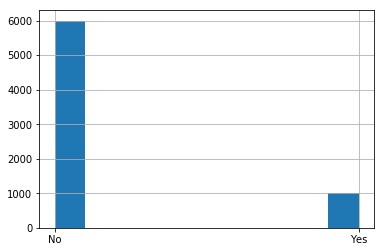

In [58]:
data['Bike Buyer'].hist(bins=10)

From the above histogram it is evidant that more number of customers in our dataset are not bike buyers.

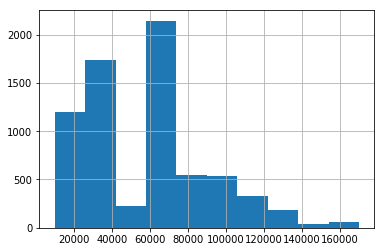

In [59]:
data['Yearly Income'].hist()

In [60]:
data['Yearly Income'].mean()

57036.45461043603

 There are less number of people with high Yearly Income value

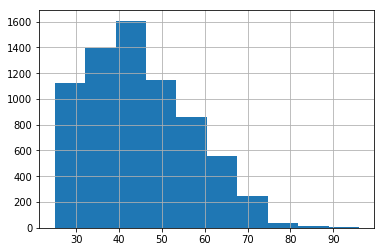

In [61]:
data['Age'].hist()

 There are more number of 40 to 50 aged people

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024997194CF8>,
      dtype=object)

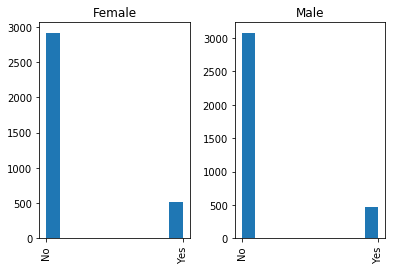

In [62]:
data.hist(column='Bike Buyer',by='Gender',bins=10)

when compared to female and male more number of females are willing to buy

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000249971DBA58>,
      dtype=object)

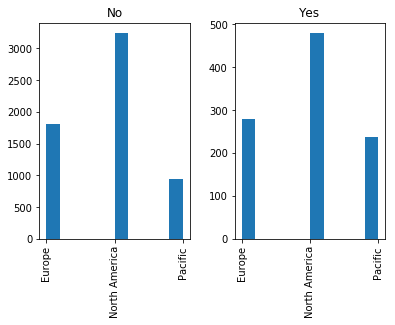

In [63]:
data.hist(column='Region',by='Bike Buyer',bins=10)

There are more number of North Americans who are willing to buy and who are not willing to buy also when compared to three regions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024997291630>,
      dtype=object)

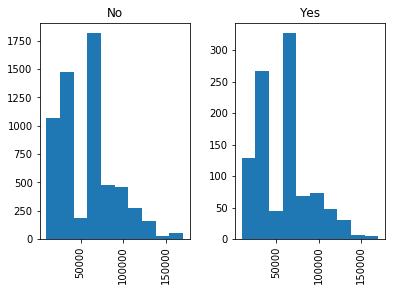

In [64]:
data.hist(column='Yearly Income',by='Bike Buyer',bins=10)

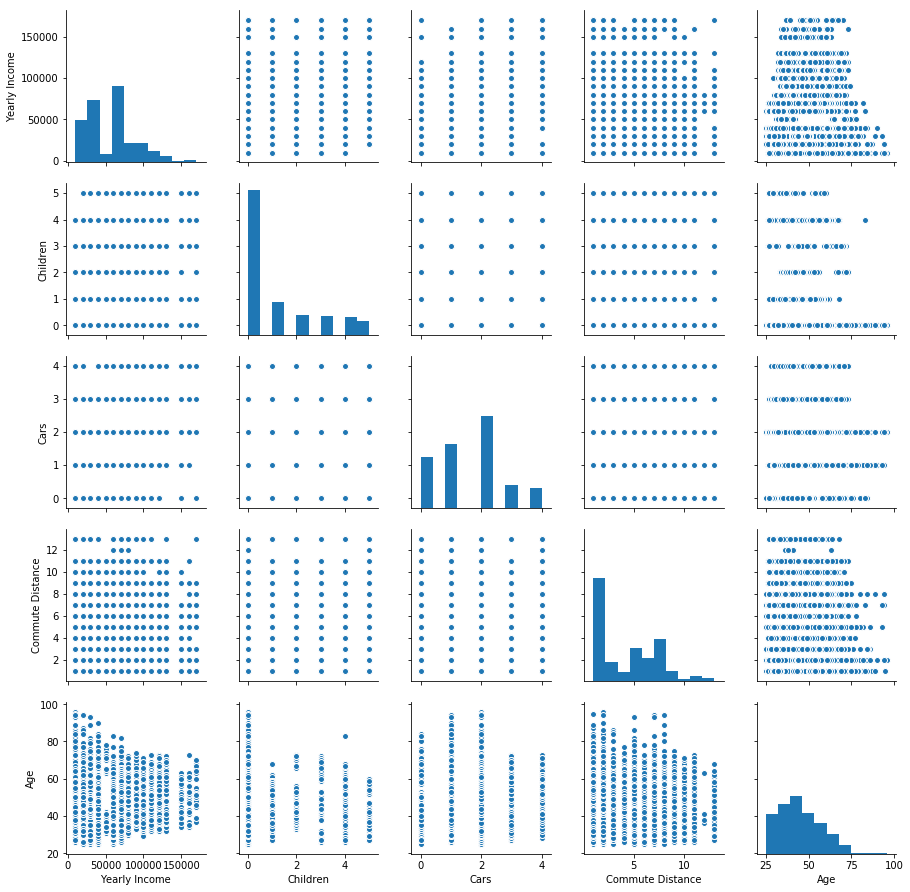

In [65]:
n=data.keys()
sns.pairplot(data[n])

From the above pairplot we cannot clearly visualize the correlation between numerical attributes so we will go with the heatmap to know clearly about the correlation

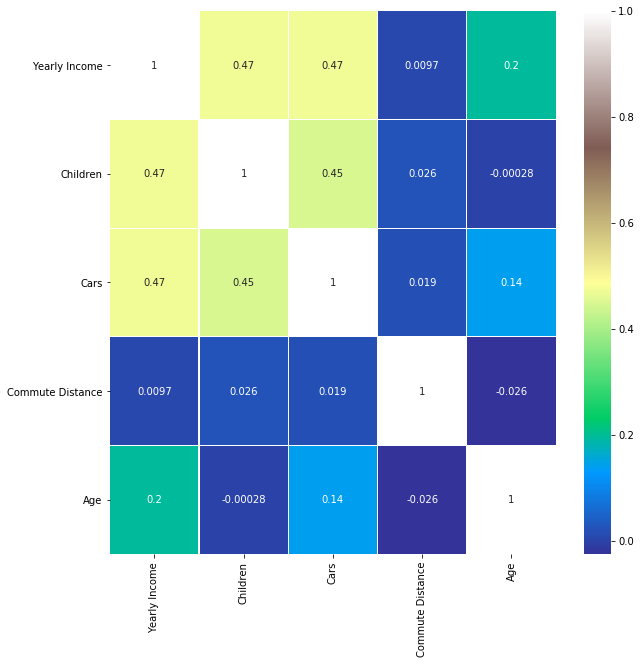

In [66]:
n=data.keys()
sns.heatmap(data[n].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

From the above heatmap we can clearly visualize the correlation between the numerical attributes. The correlation between Yearly Income to childrens and cars is 0.47 and correlation between cars and children is 0.45. But these correlations are not too high.

Now separation of independent and dependent attributes into x and y

In [67]:
x=data.iloc[:,:-1].values
y=data.iloc[:,11].values

In [68]:
x

array([['Single', 'Male', 30000, ..., 1.0, 'Europe', 33],
       ['Married', 'Female', 40000, ..., 1.0, 'Europe', 37],
       ['Married', 'Male', 160000, ..., 2.0, 'Europe', 55],
       ...,
       ['Married', 'Female', 160000, ..., 1.0, 'Europe', 53],
       ['Single', 'Female', 120000, ..., 1.0, 'Europe', 54],
       ['Married', 'Male', 130000, ..., 2.0, 'Europe', 54]], dtype=object)

In [69]:
y

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Label Encoding and OneHotEncoding

In [70]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x=LabelEncoder()

x[:,0]=labelencoder_x.fit_transform(x[:,0]) 
x[:,1]=labelencoder_x.fit_transform(x[:,1]) 
x[:,4]=labelencoder_x.fit_transform(x[:,4]) 
x[:,5]=labelencoder_x.fit_transform(x[:,5]) 
x[:,6]=labelencoder_x.fit_transform(x[:,6]) 
x[:,9]=labelencoder_x.fit_transform(x[:,9]) 


In [71]:
ohe=OneHotEncoder(categorical_features=[4])
x=ohe.fit_transform(x).toarray()
ohe=OneHotEncoder(categorical_features=[5])
x=ohe.fit_transform(x).toarray()
ohe=OneHotEncoder(categorical_features=[9])
x=ohe.fit_transform(x).toarray()

In [72]:
x

array([[ 1.,  0.,  0., ...,  1.,  0., 33.],
       [ 1.,  0.,  0., ...,  1.,  0., 37.],
       [ 0.,  0.,  0., ...,  2.,  0., 55.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0., 53.],
       [ 0.,  0.,  0., ...,  1.,  0., 54.],
       [ 0.,  0.,  0., ...,  2.,  0., 54.]])

In [73]:
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [74]:
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Normalising to rescale the features to a standard range of values using MinMaxScaler 

In [75]:

minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11267606],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16901408],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.42253521],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.3943662 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4084507 ],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.4084507 ]])

## splitting to training and testing data

In [76]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
x_train

array([[ 0.,  0.,  0., ...,  5.,  1., 32.],
       [ 0.,  1.,  0., ...,  1.,  1., 54.],
       [ 0.,  0.,  0., ...,  1.,  1., 52.],
       ...,
       [ 1.,  0.,  0., ...,  1.,  1., 57.],
       [ 1.,  0.,  0., ...,  2.,  2., 34.],
       [ 0.,  0.,  0., ...,  3.,  1., 46.]])

In [78]:
x_test

array([[ 1.,  0.,  0., ...,  1.,  1., 50.],
       [ 1.,  0.,  0., ...,  8.,  0., 44.],
       [ 1.,  0.,  0., ...,  2.,  1., 61.],
       ...,
       [ 1.,  0.,  0., ...,  5.,  2., 30.],
       [ 0.,  0.,  1., ...,  9.,  0., 38.],
       [ 1.,  0.,  0., ...,  3.,  2., 27.]])

In [79]:
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

#  Benchmark model
Here we will consider **knn** model as the benchmark model. We will find out the accuracy, precision, recall and f1_score of this model and try to achive the better f1_score than this model.

In [81]:
from sklearn import cross_validation,neighbors
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
knn_y_pred=clf.predict(x_test)

In [83]:
knn_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix
clf_cm_test=confusion_matrix(y_test,knn_y_pred)
clf_cm_test

array([[1174,   36],
       [ 153,   36]], dtype=int64)

In [86]:
from sklearn.metrics import precision_score, \
    recall_score, \
    accuracy_score, f1_score

In [87]:
knn_fscore=f1_score(y_test, knn_y_pred)
print ('Accuracy:', accuracy_score(y_test, knn_y_pred))
print ('F1 score:', f1_score(y_test, knn_y_pred))
print ('Recall:', recall_score(y_test, knn_y_pred))
print ('Precision:', precision_score(y_test, knn_y_pred))

Accuracy: 0.8649035025017869
F1 score: 0.27586206896551724
Recall: 0.19047619047619047
Precision: 0.5


## We achived the test f1_score 0.27 using the knn model now we will try to achive the f1_score greater than this.

#### We will now carry on with the classification models like svm, decision tree, random forest and try to find the better f1_score than the benchmark model.

# Support Vector Classification

In [88]:
from sklearn.svm import SVC
sc=SVC(kernel='rbf')  #rbf system defined
sc_classifier=sc.fit(x_train,y_train)#model building on training data

In [89]:
svc_y_pred=sc_classifier.predict(x_test)
print(svc_y_pred)

[0 0 0 ... 0 0 0]


In [90]:
y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [91]:
from sklearn.metrics import confusion_matrix
sc_cm_test=confusion_matrix(y_test,svc_y_pred)
sc_cm_test

array([[1205,    5],
       [ 175,   14]], dtype=int64)

In [92]:
svm_fscore=f1_score(y_test, svc_y_pred)
print ('Accuracy:', accuracy_score(y_test, svc_y_pred))
print ('F1 score:', f1_score(y_test, svc_y_pred))
print ('Recall:', recall_score(y_test, svc_y_pred))
print ('Precision:', precision_score(y_test, svc_y_pred))

Accuracy: 0.8713366690493209
F1 score: 0.1346153846153846
Recall: 0.07407407407407407
Precision: 0.7368421052631579


# Decision tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
dtc_y_pred=dtc_clf.predict(x_test)
dtc_y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [107]:
from sklearn.metrics import confusion_matrix
dtc_cm_test=confusion_matrix(y_test,dtc_y_pred)

In [108]:
dtc_cm_test

array([[1084,  126],
       [ 121,   68]], dtype=int64)

In [109]:
dt_fscore=f1_score(y_test, dtc_y_pred)
print ('Accuracy:', accuracy_score(y_test, dtc_y_pred))
print ('F1 score:', f1_score(y_test, dtc_y_pred))
print ('Recall:', recall_score(y_test, dtc_y_pred))
print ('Precision:', precision_score(y_test, dtc_y_pred))

Accuracy: 0.823445318084346
F1 score: 0.3550913838120104
Recall: 0.35978835978835977
Precision: 0.35051546391752575


# Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
rf_clf=clf.fit(x_train , y_train)
rf_pred=rf_clf.predict(x_test)


In [111]:
rf_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [112]:
rf_fscore=f1_score(y_test, rf_pred)
print ('Accuracy:', accuracy_score(y_test, rf_pred))
print ('F1 score:', f1_score(y_test, rf_pred))
print ('Recall:', recall_score(y_test, rf_pred))
print ('Precision:', precision_score(y_test, rf_pred))

Accuracy: 0.860614724803431
F1 score: 0.32525951557093424
Recall: 0.24867724867724866
Precision: 0.47


##### Here are the f1_scores of all models

##### For DecisionTreeClassifier we got highest f1_score (0.35) value than benchmark model and other models.

## Refinement

Here we will discuss the process of improvement I made up on the algorithms and techniques use in my previous implimentation. In the above section I got decision tree f1_score more than any other . now I will try to refine it for obtaining better f1_score. Here we will use GridSearchCV()

In [146]:
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=100)

# TODO: Create the parameters list you wish to tune
parameters = {"max_depth": range(1,20), "random_state":[100]}

# TODO: Make an fbeta_score scoring object


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf,parameters,scoring='f1')

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(x_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions 
predictions = (clf.fit(x_train, y_train)).predict(x_test)
best_predictions = best_clf.predict(x_test)



print("\nOptimized Model\n------")
print("Final fbeta score on the testing data: {:.6f}".format(fbeta_score(y_test, best_predictions, beta=1 )))
t_dt_fscore=fbeta_score(y_test, best_predictions, beta=1 )

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Optimized Model
------
Final fbeta score on the testing data: 0.364130


##### By tuning the decision tree classifier I achived an f1_score of which is better than the untuned model.

In [114]:
Fscore=[knn_fscore,svm_fscore,dt_fscore,rf_fscore,t_dt_fscore]
classifiers=['(Benchmark)KNN','SVM','Decision Tree','Random Forest','Tuned Decision Tree']
summary = pd.DataFrame({'Fscore':Fscore}, index=classifiers)       
summary

,Fscore
(Benchmark)KNN,0.275862
SVM,0.134615
Decision Tree,0.355091
Random Forest,0.325260
Tuned Decision Tree,0.364130


## Conclusion:
Out of the above chosen models Decision Tree yields the better f1_score of 0.36 than the other models. By using all the above models we get better accuracy than the benchmark model except svm. But out of those we can see that the DecisionTree have the better f1_score than the others. So I can say that the decision tree is the better algorithm which can be used to predict whether a customer is bike buyer or not.

<Container object of 5 artists>

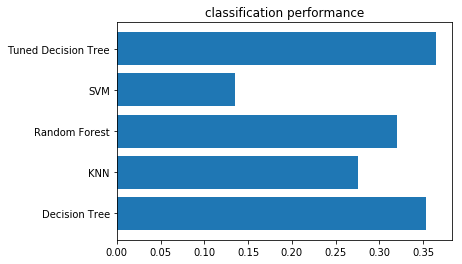

In [102]:
x_axis=['KNN','SVM','Random Forest','Decision Tree','Tuned Decision Tree']
y_axis=[0.275862,0.134615,0.320557,0.352941,0.364130]
plt.title('classification performance')
plt.barh(x_axis,y_axis)